In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


Load packages

In [47]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns

from sklearn.metrics import accuracy_score,classification_report,roc_auc_score


In [10]:
file_path="/kaggle/input/creditcardfraud/creditcard.csv"
cred_df=pd.read_csv(file_path)

In [11]:
cred_df.shape

(284807, 31)

In [12]:
print(cred_df[cred_df.Class==0].shape)
print(cred_df[cred_df.Class==1].shape)

(284315, 31)
(492, 31)


In [13]:
cred_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.369007e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.500885e-15,-5.620335e-16,1.149614e-16,-2.426963e-15,...,1.596686e-16,-3.576577e-16,2.650499e-16,4.472317e-15,5.109395e-16,1.686100e-15,-3.662399e-16,-1.225457e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


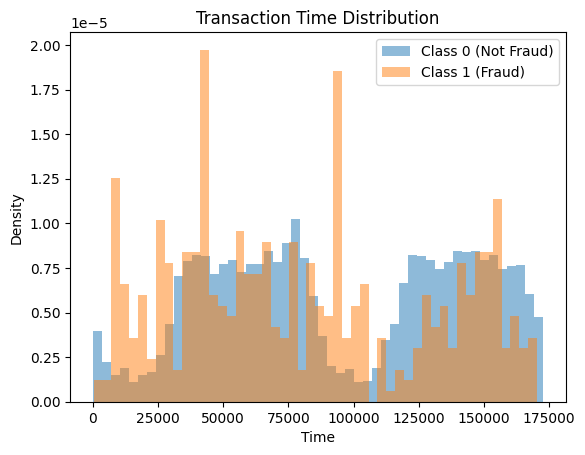

In [14]:
class_0=cred_df.loc[cred_df["Class"]==0]["Time"]
class_1=cred_df.loc[cred_df["Class"]==1]["Time"]

plt.hist(class_0, bins=50, alpha=0.5, label="Class 0 (Not Fraud)", density=True)
plt.hist(class_1, bins=50, alpha=0.5, label="Class 1 (Fraud)", density=True)
plt.xlabel("Time")
plt.ylabel("Density")
plt.title("Transaction Time Distribution")
plt.legend()
plt.show()

Hist shows the distribution of credit transactions occurred over the time relative to first transaction. Higer density signifies, more number of transactions happend within that period. 

In [15]:
cred_df["Hour"]=cred_df["Time"].apply(lambda x:np.floor(x%24))
temp=cred_df.groupby(["Class","Hour"])["Amount"].aggregate(["min","max","mean","median","std","count","sum",]).reset_index()
temp_df=pd.DataFrame(temp)
temp_df.columns=["Class","Hour","Min","Max","Mean","Median","Variation","Transactions","Total Amount"]
temp_df.head(6)

,Class,Hour,Min,Max,Mean,Median,Variation,Transactions,Total Amount
0,0,0.0,0.0,5707.82,87.307008,20.00,225.478186,11655,1017563.18
1,0,1.0,0.0,11789.84,89.847615,21.95,273.530183,11650,1046724.72
2,0,2.0,0.0,6669.00,85.219995,21.10,235.434626,11799,1005510.72
3,0,3.0,0.0,8787.00,90.879137,22.50,272.826286,11806,1072919.09
4,0,4.0,0.0,6511.00,84.700849,20.89,223.087572,11960,1013022.16
5,0,5.0,0.0,11898.09,90.042729,22.39,276.551752,11887,1070337.92


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

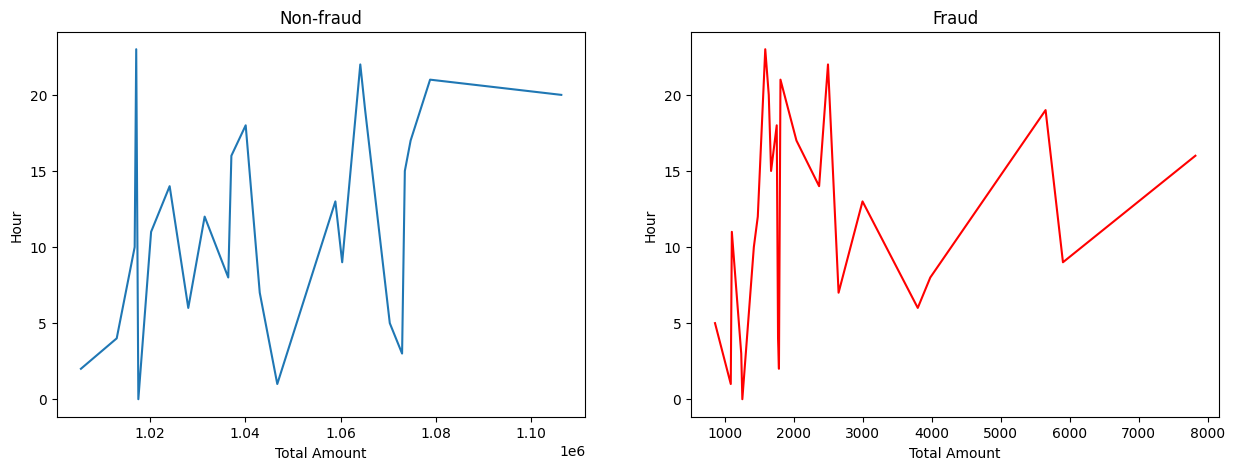

In [16]:

cred_df.replace([np.inf, -np.inf], np.nan, inplace=True)
cred_df.dropna(subset=["Hour", "Amount"], inplace=True)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

sns.lineplot(ax=ax1, x="Total Amount", y="Hour", data=temp_df.loc[temp_df.Class==0])
sns.lineplot(ax=ax2, x="Total Amount", y="Hour", data=temp_df.loc[temp_df.Class==1],color="red")
ax1.set_title("Non-fraud")
ax2.set_title("Fraud")
plt.show()

* Fraud transactions tends to have smaller amount but they have higher variations when amount is higher.
* Fraud Transactions happens mostly in range of 40s which indiciates transactions frequently happens at night or dawn time.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: title={'center': 'Number of Fradulent transactions'}, xlabel='Transactions', ylabel='Hour'>

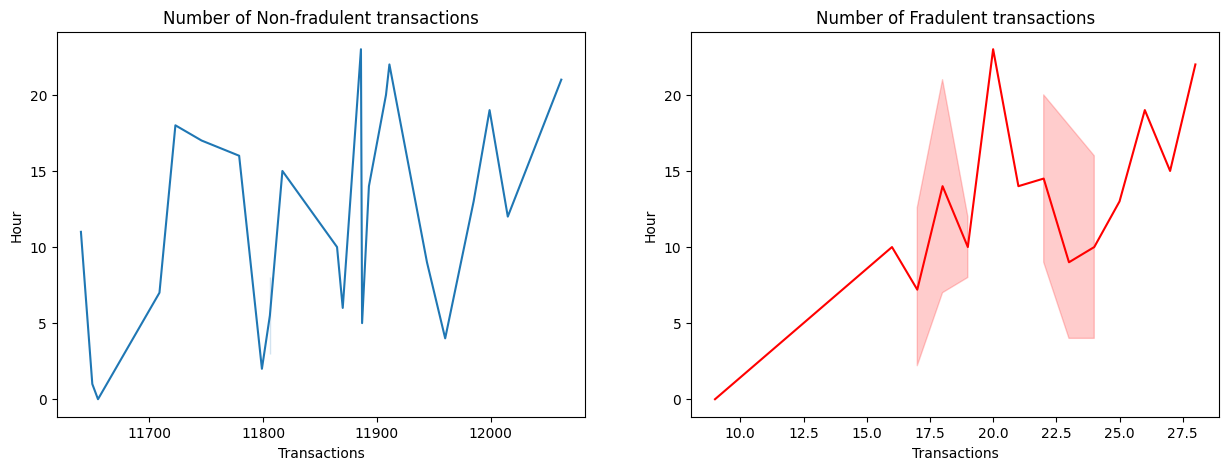

In [17]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
class_0=temp_df[temp_df.Class==0]
class_1=temp_df[temp_df.Class==1]
ax1.set_title("Number of Non-fradulent transactions")
ax2.set_title("Number of Fradulent transactions")
sns.lineplot(ax=ax1,x="Transactions",y="Hour",data=class_0)
sns.lineplot(ax=ax2,x="Transactions",y="Hour",data=class_1,c="red")

Fradulents transactions peeked during later day hours similar to the non-fradulent,while during other hours it transactions show higher varations.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Text(0.5, 0.98, 'Average amount of Transactions')

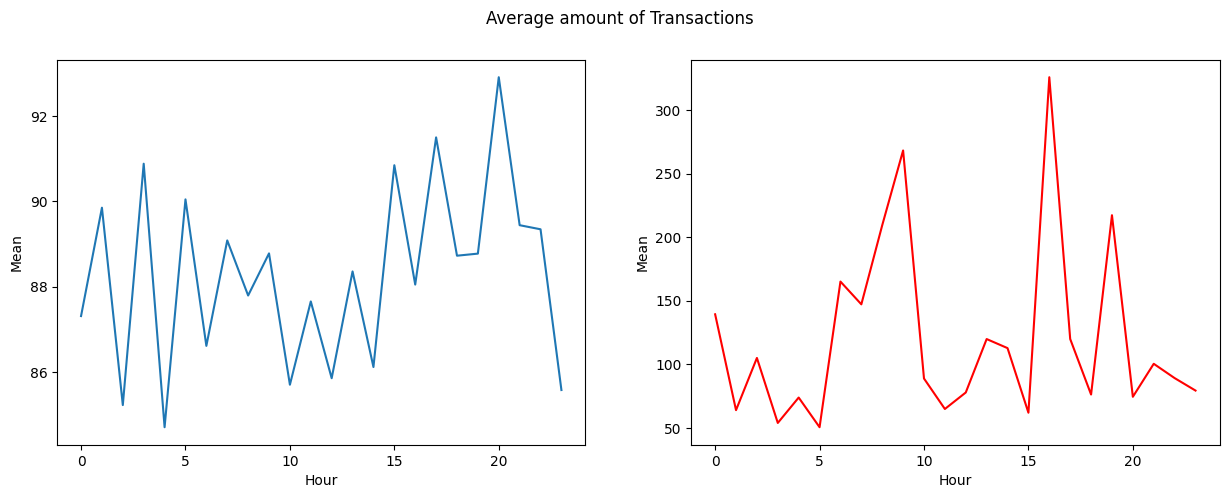

In [18]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
class_0=temp_df[temp_df.Class==0]
class_1=temp_df[temp_df.Class==1]

sns.lineplot(ax=ax1,x="Hour",y="Mean",data=class_0)
sns.lineplot(ax=ax2,x="Hour",y="Mean",data=class_1,c='red')
plt.suptitle("Average amount of Transactions")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Text(0.5, 0.98, 'Variation of Transactions')

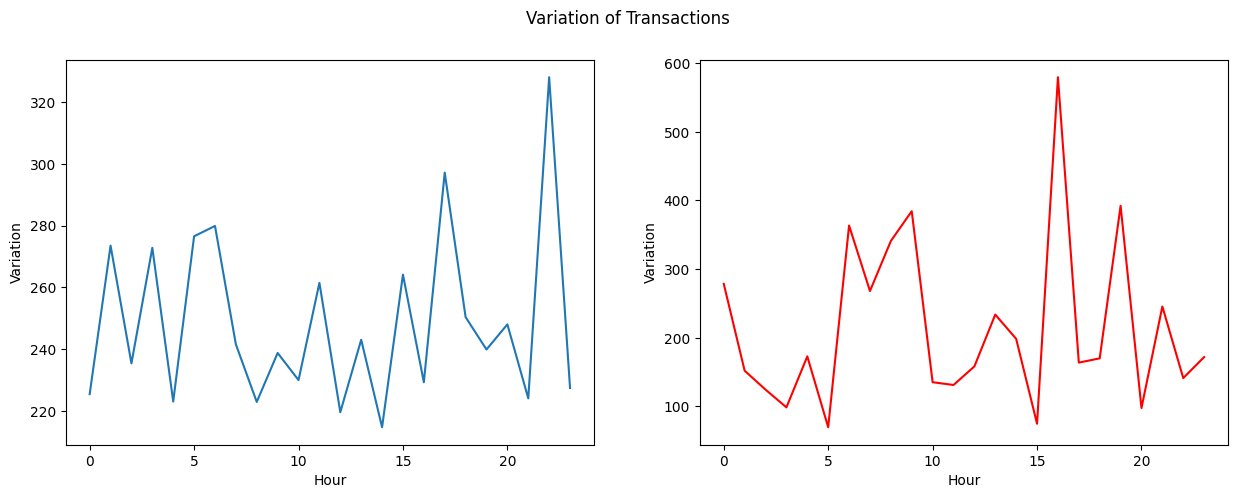

In [19]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
class_0=temp_df[temp_df.Class==0]
class_1=temp_df[temp_df.Class==1]

sns.lineplot(ax=ax1,x="Hour",y="Variation",data=class_0)
sns.lineplot(ax=ax2,x="Hour",y="Variation",data=class_1,c='red')
plt.suptitle("Variation of Transactions")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Text(0.5, 0.98, 'Maxium transactions')

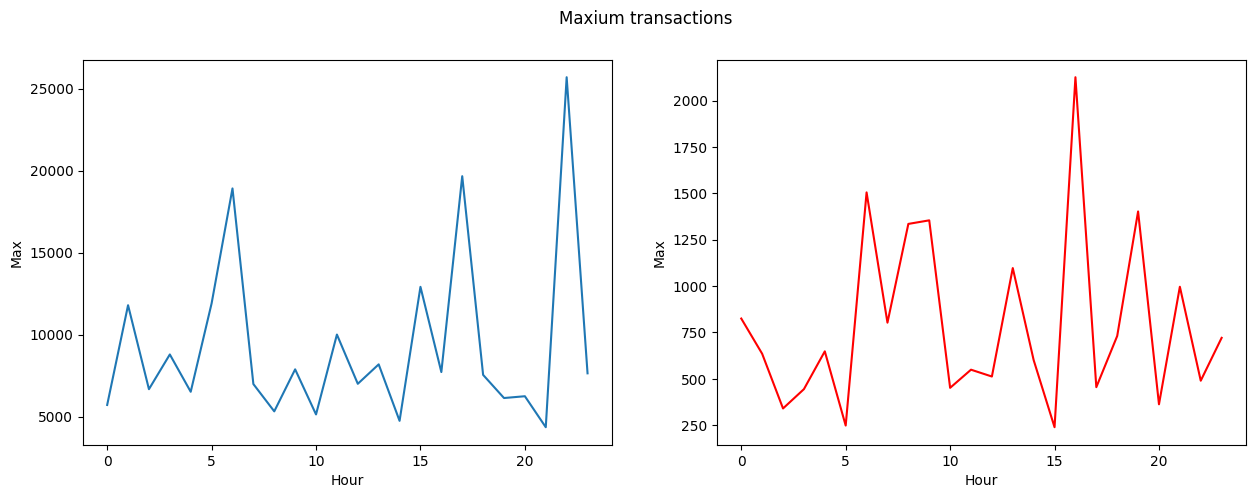

In [20]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
class_0=temp_df[temp_df.Class==0]
class_1=temp_df[temp_df.Class==1]

sns.lineplot(ax=ax1,x="Hour",y="Max",data=class_0)
sns.lineplot(ax=ax2,x="Hour",y="Max",data=class_1,c='red')
plt.suptitle("Maxium transactions")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Text(0.5, 0.98, 'Minimum transactions')

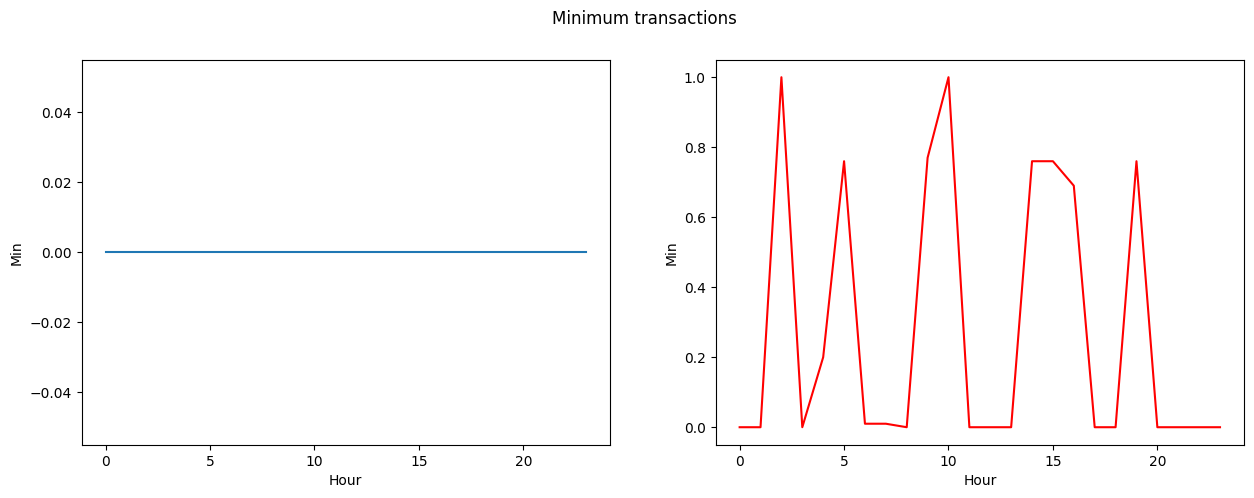

In [21]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
class_0=temp_df[temp_df.Class==0]
class_1=temp_df[temp_df.Class==1]

sns.lineplot(ax=ax1,x="Hour",y="Min",data=class_0)
sns.lineplot(ax=ax2,x="Hour",y="Min",data=class_1,c='red')
plt.suptitle("Minimum transactions")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Text(0.5, 0.98, 'Median of  transactions')

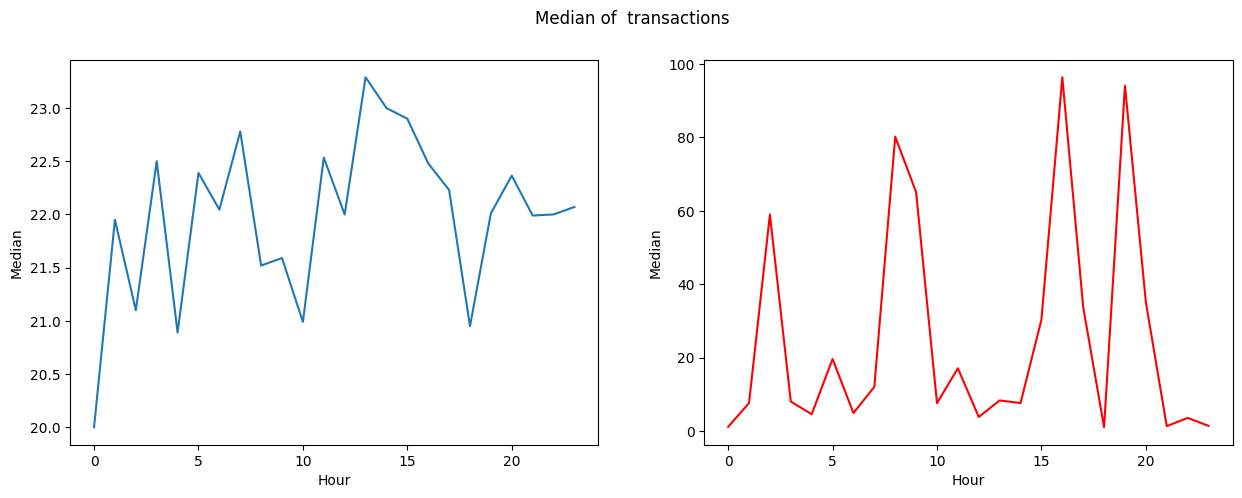

In [22]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
class_0=temp_df[temp_df.Class==0]
class_1=temp_df[temp_df.Class==1]

sns.lineplot(ax=ax1,x="Hour",y="Median",data=class_0)
sns.lineplot(ax=ax2,x="Hour",y="Median",data=class_1,c='red')
plt.suptitle("Median of  transactions")

Text(0.5, 0.98, 'Median of  transactions')

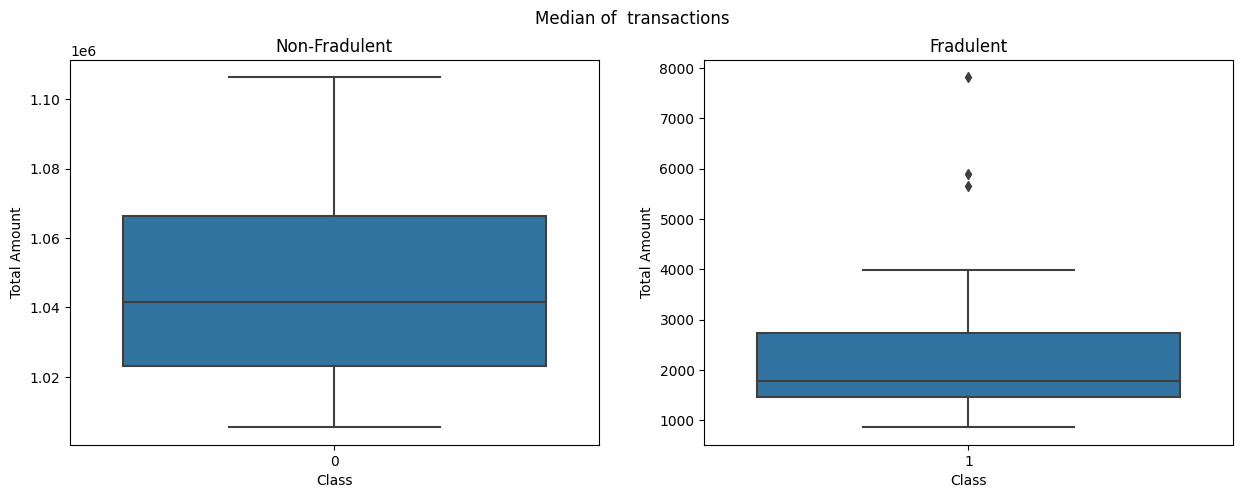

In [23]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
class_0=temp_df[temp_df.Class==0]
class_1=temp_df[temp_df.Class==1]

sns.boxplot(ax=ax1,x="Class",y="Total Amount",data=class_0)
sns.boxplot(ax=ax2,x="Class",y="Total Amount",data=class_1)
ax1.set_title("Non-Fradulent")
ax2.set_title("Fradulent")
plt.suptitle("Median of  transactions")

In [24]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']
train_df, test_df = train_test_split(cred_df, test_size=0.20, random_state=2018, shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=0.20, random_state=2018, shuffle=True )

In [25]:
clf = RandomForestClassifier(n_jobs=100, 
                             random_state=2018,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=100, random_state=2018, verbose=False)

<Axes: xlabel='Feature Importance', ylabel='features'>

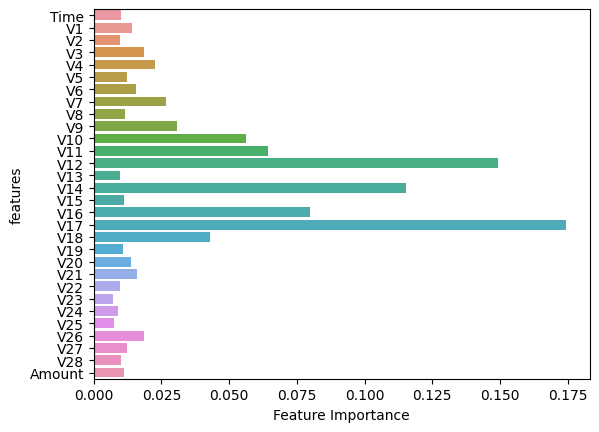

In [26]:
tmp=pd.DataFrame({"features":predictors,"Feature Importance":clf.feature_importances_})
tmp.sort_values(by="Feature Importance",ascending=False)
sns.barplot(x="Feature Importance",y="features",data=tmp)

V12 & V17 feature has heavy influence on classifying the frudulent transactions.

In [27]:
test_pred=clf.predict(test_df[predictors])
valid_pred=clf.predict(valid_df[predictors])

<Axes: xlabel='Predicted', ylabel='Actual'>

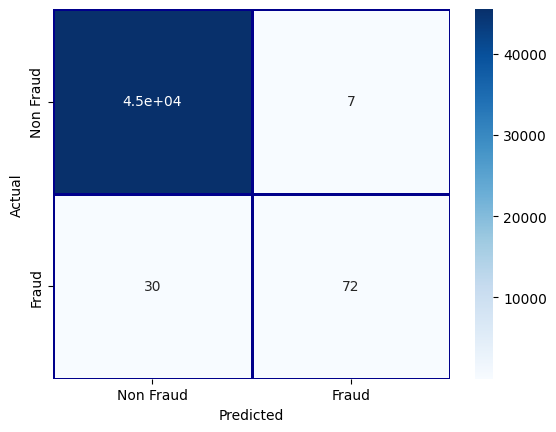

In [28]:
cm=pd.crosstab(valid_df[target].values,valid_pred,rownames=["Actual"],colnames=["Predicted"],)
sns.heatmap(cm,xticklabels=["Non Fraud","Fraud"],yticklabels=["Non Fraud","Fraud"],annot=True,linewidth=2,linecolor="Darkblue",cmap="Blues")

<Axes: xlabel='Predicted', ylabel='Actual'>

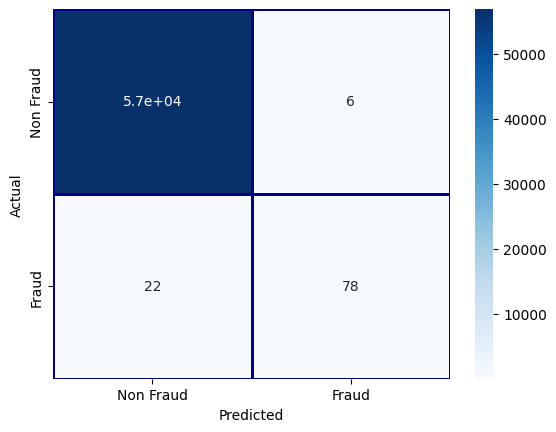

In [29]:
cm=pd.crosstab(test_df[target].values,test_pred,rownames=["Actual"],colnames=["Predicted"])
sns.heatmap(cm,annot=True,xticklabels=["Non Fraud","Fraud"],yticklabels=["Non Fraud","Fraud"],cmap='Blues',linewidth=1,linecolor='Darkblue')

* On the training data,model classified 30 fraud transactions as non fraud and 7 non fraud were classified as fraud.
* On the testing data,22 fraud transactions were classified as non fraud ,while 6 non-fraud transactions were classified as fraud by the model.

In [40]:
lr=LogisticRegression(max_iter=5000,class_weight="balanced").fit(train_df[predictors],train_df[target])

In [42]:
y_valid_pred=lr.predict(valid_df[predictors])
y_test_pred=lr.predict(test_df[predictors])

valid_accuracy=accuracy_score(valid_df[target],y_valid_pred)
test_accuracy=accuracy_score(test_df[target],y_test_pred)

print("Training accuracy score {:.2f}".format(valid_accuracy))
print("Testing accuracy score {:.2f}".format(test_accuracy))

Training accuracy score 0.97
Testing accuracy score 0.97


In [52]:
roc_score=roc_auc_score(test_df[target],y_test_pred)
print("ROC score ->{:.2f}".format(roc_score))

ROC score ->0.91


Receiver Operating Characteristic Curve
* Sensitivity->how well the model classify positive cases.
* Specificity->how well the model identify and avoid negetive cases.
* The cutoff is the decision boundary that turns probability predictions into Yes (1) or No (0).
Screening vs Confiromatory test
* **Screening** (detecting positive)
   * goal-> to catch all possible positive cases
   * Higher Sensitivity->Less possible case of negetive case.
   * Example: A rapid COVID test detects 99% of real cases but may incorrectly flag         healthy people.
* **Confirmatory** (reducing negetive)
   * goal-> to eliminate false positive cases and correct diagnosis
   * Higher Specificity->Less false positive cases